Решить краевую задачу для дифференциального уравнения эллиптического типа. Аппроксимацию уравнения произвести с использованием центрально-разностной схемы. Для решения дискретного аналога применить следующие методы: метод простых итераций (метод Либмана), метод Зейделя, метод простых итераций с верхней релаксацией. Вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,y)$.  Исследовать зависимость погрешности от сеточных параметров $h_x$, $h_y$.

$$ \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} + u = 0 $$
$ u_x(0, y) = y \\ u_x(\frac{\pi}{2}, y) = 0 \\ u(x, 0) = 0 \\ u(x, 1) = sin(x) $

$$ U(x, y) = y sin(x)$$

In [4]:
import math
import typing
from typing import List
import matplotlib.pyplot as plt

### Входные условия

In [5]:
x_left = 0
x_right = math.pi/2
y_left = 0
y_right = 1
a = 1
b = 1
c = -1
alpha_1, betta_1 = 1, 0
alpha_2, betta_2 = 1, 0
alpha_3, betta_3 = 0, 1
alpha_4, betta_4 = 0, 1

In [6]:
def phi_1(y:float) -> float:
    return y

def phi_2(y:float) -> float:
    return 0

def phi_3(x:float) -> float:
    return 0

def phi_4(x:float) -> float:
    return math.sin(x)

def f(x:float, y:float) -> float:
    return 0

def U(x:float, y:float) -> float:
    return y * math.sin(x)

def real_U(X:list, Y:list) -> list:
    n = len(X)
    m = len(Y)
    U_true = [[0] * n for _ in range(m)]
    for k in range(m):
        for j in range(n):
            U_true[k][j] = U(X[j], Y[k])
    return U_true

### Вспомогательные функиции

графики

In [7]:

def plot_graphs(new_X:list, new_T:list, found_U:list, U_true:list, s:str='') -> None:
    plt.plot(new_X, U_true[len(new_T) // 4 ],  label='Аналитическое решение')
    plt.plot(new_X, found_U[len(new_T) // 4 ], label=s, linestyle='dashdot')
    plt.plot(new_X, U_true[len(new_T) // 2 ], label='Аналитическое решение')
    plt.plot(new_X, found_U[len(new_T) // 2 ], label=s, linestyle='dashdot')
    plt.plot(new_X, U_true[len(new_T) - 1], label='Аналитическое решение')
    plt.plot(new_X, found_U[len(new_T) - 1],label=s, linestyle='dashdot')
    plt.legend()

график ошибки от h

In [8]:
def error (U_my:list, U_true:list) -> float:
    return sum([abs(a - b) for a, b in zip(U_my, U_true)])
def get_error_array_with_h(N:list, left:float, right:float, a:float, b:float, c:float, d:float, alpha:float, betta:float, gamma:float, delta:float, find_u:typing.Callable, t_end:float=1, appoximation:int=1, appoximation_start:float=1) -> (list, list): # H, error
    H = [right/(n - 1) for n in N]
    ERROR = []
    for n in N:
        XX, TT, UU = find_u(left, right, a, b, c, d, alpha, betta, gamma, delta, n=n, t_end=t_end, appoximation=appoximation, appoximation_start=appoximation_start)
        U_true = real_U(XX, TT)
        t = len(TT) // 2
        ERROR.append(error(UU[t], U_true[t]))
    
    return H, ERROR

In [9]:
def frange(start:float, stop:float, step:float) -> float:
    while start < stop:
        yield start
        start += step

In [10]:
def get_y(y0:float, y_end:float, h:float) -> list:
    return [i for i in frange(y0, y_end+h, h)]

def get_x(x_0:float, x_l:float, h:float) -> list:
    return [i for i in frange(x_0, x_l+h, h)]

Отношение конечной разности по схеме

$$\frac{u_{i+1, j} - 2 u_{i, j} + u_{i-1, j}}{h_1^2}  + \frac{u_{i, j+1} - 2 u_{i, j} + u_{i, j-1}}{h_2^2} + O(h_1^2 + h_2^2) = f(x_i, y_i)$$

мой случай 
$$ \frac{u_{i+1, j} - 2 u_{i, j} + u_{i-1, j}}{h_1^2}  +  \frac{u_{i, j+1} - 2 u_{i, j} + u_{i, j-1}}{h_2^2} + c u_{i, j} = f(x_i, y_i) $$

### Метод Лимбмана

In [22]:
def error(U_prev:List[List[float]], U_values:List[List[float]]) -> float:
    eps = 0
    for i in range(len(U_prev)):
        for j in range(len(U_prev[0])):
            eps = max(eps, abs(U_prev[i][j] - U_values[i][j]))
    return eps

def limbman(x_left:float, x_right:float, y_left:float, y_right:float, a:float, b:float, c:float, d:float=0, eps:float=0.1, n_x:float=10, n_y:float=10) -> (List[float], List[float], List[List[float]]):
    hx = x_right / (n_x - 1)
    hy = y_right / (n_y - 1)
    X = get_x(x_left, x_right, hx)
    Y = get_y(y_left, y_right, hy)

    U_values = [[0] * len(X) for _ in range(len(Y))]
    U_prev = [[10] * len(X) for _ in range(len(Y))]

    for i in range(len(X)):
        U_values[i][0] = phi_3(X[i]) 
        U_values[i][-1] = phi_4(X[i])    
    for i in range(len(Y)):
        U_values[0][i] = phi_1(Y[i])
        U_values[-1][i] = phi_2(Y[i])

    cnt = 0
    while (error(U_prev, U_values) > eps):
        U_prev = list(U_values)
        for j in range(1, len(Y) - 1):
            for i in range(1, len(X) - 1):

                ##U_values[i+1][j] = 2 * U_values[i][j] - U_values[i-1][j] - (hx / hy) ** 2 * (U_values[i][j+1] - 2 * U_values[i][j] + U_values[i][j-1]) - hx**2 * c * U_values[i][j] - hx**2 * f(X[i], Y[j])
                U_values[i,j] = (hx * hx * f(X[i],Y[j]) - (U_prev[i+1][j] + U_prev[i-1][j]) - d * hx * hx * (U_prev[i][j+1] + U_prev[i][j-1]) / (hy * hy) - a * hx * (U_prev[i+1][j] - U_prev[i-1][j]) / 2 - b * hx * hx * (U_prev[i][j+1] - U_prev[i][j-1]) / (2 * hy)) / (c * hx * hx - 2 * (hy * hy + d * hx * hx)/ (hy * hy))
        cnt +=1

    print(cnt)
    return X, Y, U_values

In [23]:
X, Y, UU = limbman(x_left, x_right, y_left, y_right, a, b, c, d=0, eps=0.1, n_x=10, n_y=10)

TypeError: list indices must be integers or slices, not tuple

In [14]:
U_true = real_U(X, Y)

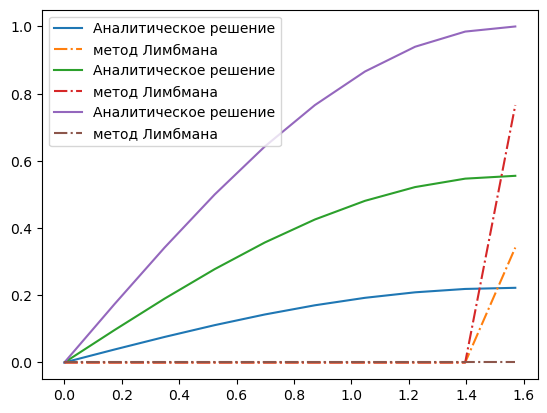

In [16]:
plot_graphs(X, Y, UU, U_true, 'метод Лимбмана')

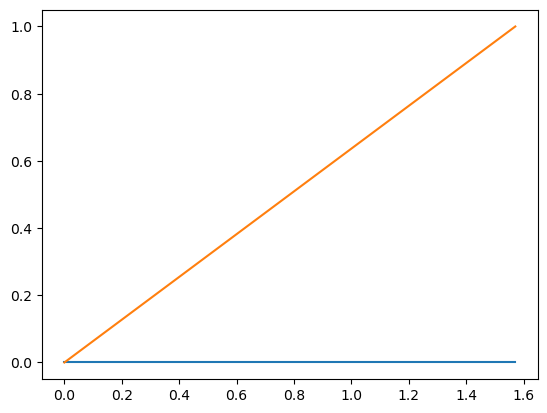

In [19]:
plt.plot(X, U_true[0])
plt.plot(X, UU[0])

### Метод Зейделя

In [ ]:
def Seidel():
    X = get_x(x_left, x_right, hx)
    Y = get_y(y_left, y_right, hy)

    U_values = [[0] * len(X) for _ in range(len(Y))]


    for i in range(len(X)):
        U_values[i][0] = phi_3(X[i]) 
        U_values[i][-1] = phi_4(X[i])    
    for i in range(len(Y)):
        U_values[0][i] = phi_1(Y[i])
        U_values[-1][i] = phi_2(Y[i])

### Метод простых итераций с верхней релаксацией

In [ ]:
def relax():
    X = get_x(x_left, x_right, hx)
    Y = get_y(y_left, y_right, hy)

    U_values = [[0] * len(X) for _ in range(len(Y))]


    for i in range(len(X)):
        U_values[i][0] = phi_3(X[i]) 
        U_values[i][-1] = phi_4(X[i])    
    for i in range(len(Y)):
        U_values[0][i] = phi_1(Y[i])
        U_values[-1][i] = phi_2(Y[i])